<a href="https://colab.research.google.com/github/KellieLeonard-Biostat/WDBC-Dataset/blob/main/genemutationsdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-59c61de7dd27>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mutation_freq.index, y=mutation_freq.values, palette='viridis')


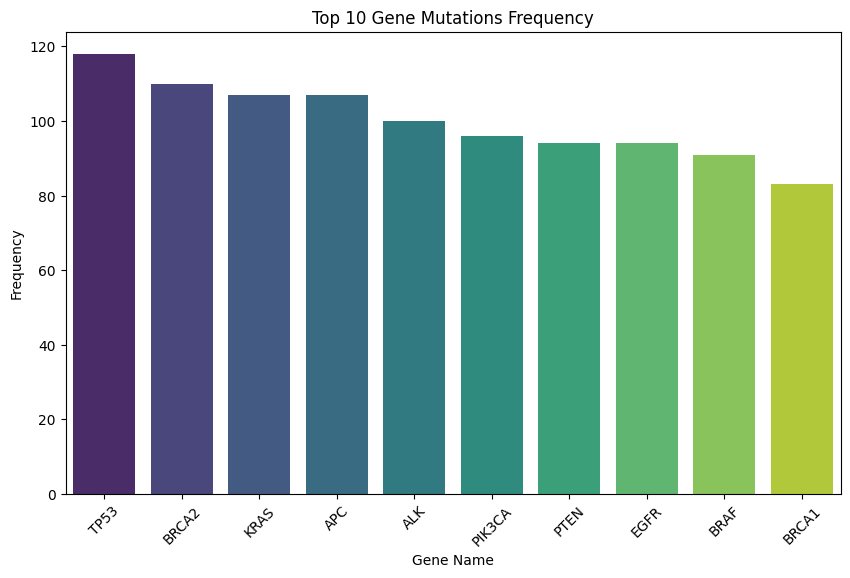

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a CSV file named 'mutation_data.csv'
# Replace 'mutation_data.csv' with the actual path to your file
df = pd.read_csv('mutation_data.csv')

# Calculate mutation frequency
mutation_freq = df['Gene Name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=mutation_freq.index, y=mutation_freq.values, palette='viridis')
plt.title("Top 10 Gene Mutations Frequency")
plt.xlabel("Gene Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

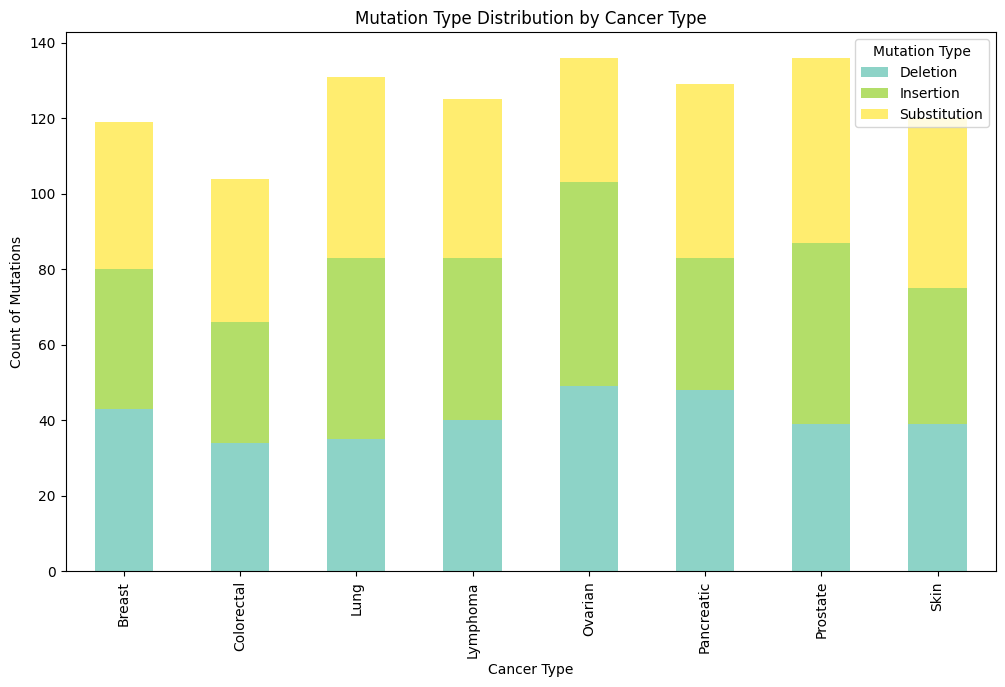

In [6]:
# Count mutation types per cancer type
mutation_type_cancer = df.groupby(['Cancer Type', 'Mutation Type']).size().unstack().fillna(0)

# Plot
mutation_type_cancer.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Set3')
plt.title("Mutation Type Distribution by Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Count of Mutations")
plt.xticks(rotation=90)
plt.show()


In [12]:
import plotly.express as px

# Prepare data for Plotly
mutation_summary = df.groupby(['Gene Name', 'Cancer Type']).size().reset_index(name='Mutation Frequency')

# Bubble chart with Plotly
fig = px.scatter(mutation_summary,
                 x="Gene Name",
                 y="Cancer Type",
                 size="Mutation Frequency",
                 color="Mutation Frequency",
                 hover_name="Gene Name",
                 size_max=60,
                 title="Gene Mutations Across Different Cancer Types")

fig.show()


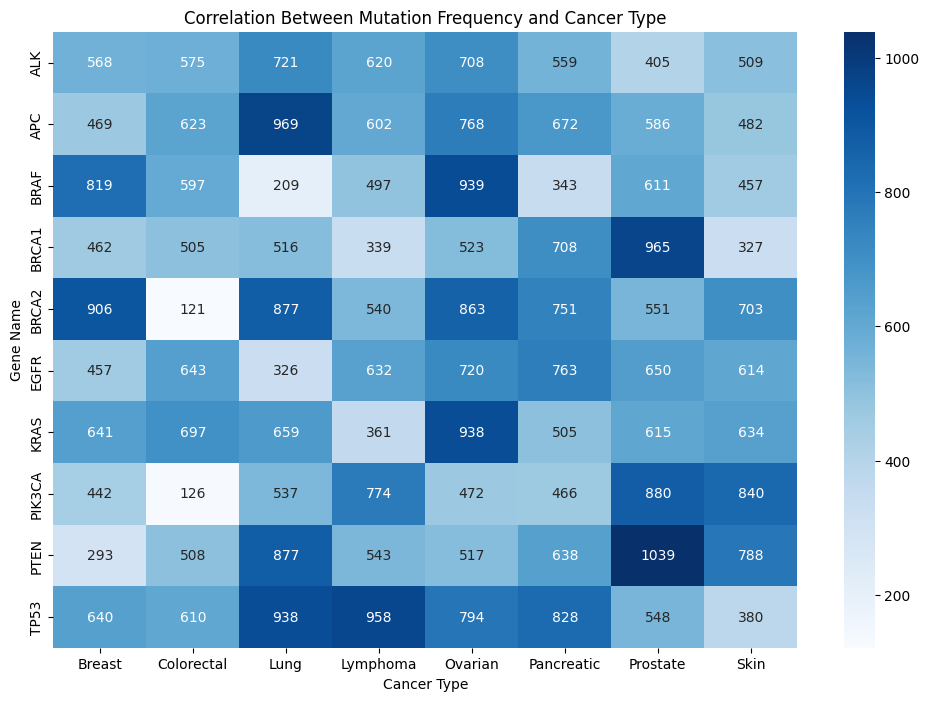

In [8]:
import seaborn as sns

# Create a pivot table for mutation frequency by cancer type
mutation_cancer_pivot = df.pivot_table(index='Gene Name', columns='Cancer Type', values='Mutation Frequency', aggfunc='sum')

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(mutation_cancer_pivot, annot=True, cmap='Blues', fmt='d')
plt.title("Correlation Between Mutation Frequency and Cancer Type")
plt.ylabel("Gene Name")
plt.xlabel("Cancer Type")
plt.show()


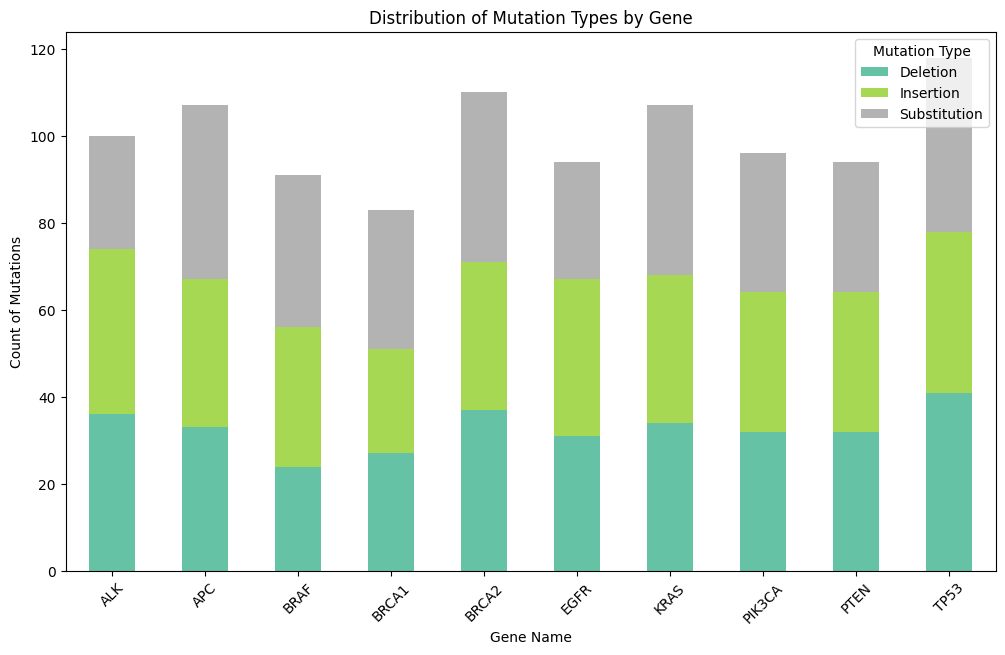

In [9]:
# Count mutation types per gene
mutation_type_gene = df.groupby(['Gene Name', 'Mutation Type']).size().unstack().fillna(0)

# Plot stacked bar plot
mutation_type_gene.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set2')
plt.title("Distribution of Mutation Types by Gene")
plt.xlabel("Gene Name")
plt.ylabel("Count of Mutations")
plt.xticks(rotation=45)
plt.show()


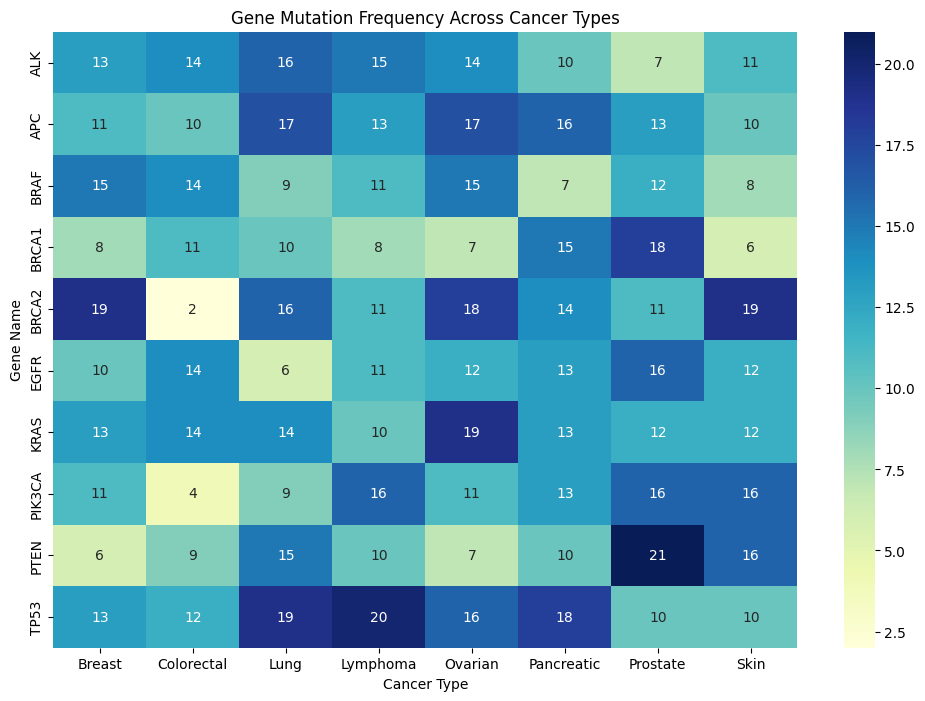

In [10]:
# Generate a heatmap for gene mutation frequency across cancer types
plt.figure(figsize=(12, 8))
sns.heatmap(mutation_summary.pivot_table(index='Gene Name', columns='Cancer Type', values='Mutation Frequency', aggfunc='sum'),
            annot=True, cmap='YlGnBu', fmt='d')
plt.title("Gene Mutation Frequency Across Cancer Types")
plt.xlabel("Cancer Type")
plt.ylabel("Gene Name")
plt.show()


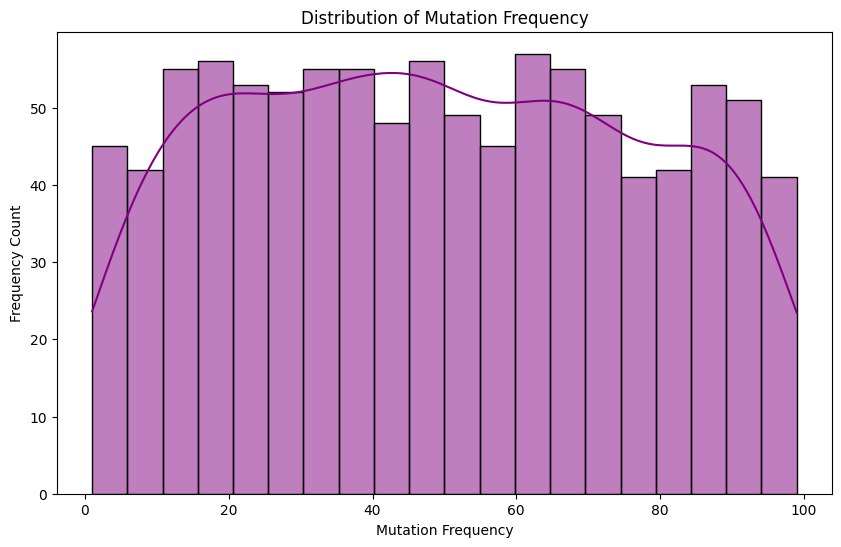

In [11]:
# Plot histogram for mutation frequency
plt.figure(figsize=(10,6))
sns.histplot(df['Mutation Frequency'], kde=True, bins=20, color='purple')
plt.title("Distribution of Mutation Frequency")
plt.xlabel("Mutation Frequency")
plt.ylabel("Frequency Count")
plt.show()
